# Final Project Submission


* Student name: **Andrew Hotchkiss**
* Student pace: **Part time**
* Scheduled project review date/time: **8/17/2020, 2pm EDT**
* Instructor name: **James Irving**
* Blog post URL: https://stones-1130.github.io/interpreting_modeling_results_after_log_transformation


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> **Assignment-** Clean, explore, and model the Kings County, WA Home Sale dataset (2014-2015) with a multivariate linear regression to predict the sale price of houses as accurately as possible.


> **Approach:**
> My goal for this project was to analyze the incentives of the (4) interested parties involved in a home sale, and provide recommendations based on furthering those interests. The interested parties are: 

> - Buyer
> - Seller
> - Buy-side real estate agent
> - Sell-side real estate agent


> Initially, I determined to what extent certain attributes of the homes affected the overall housing price. 

>  Lastly, I trained a multivariate linear regression model to be able to accurately predict home prices based on certain features of the home.



# OBTAIN

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("kc_house_data.csv")
pd.options.display.max_columns = None
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Below feature column descriptions from: https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices

![](KC_data_dict.png)

In [2]:
#EXAMINE THE DATA TYPES, ALSO LOOK FOR MISSING DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
#DROP ID and LAT/LONG COLUMNS
df.drop(['id','lat','long'],axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


> From first glance, it looks like we need to recast the following columns into the correct data type:

> - "date" object to int64 format
> - "sqft_basement" to int64
> - "yr_renovated" to int64

In [6]:
#LOOK CLOSER AT 'sqft_basement' COLUMN
df['sqft_basement'].value_counts(dropna=False)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
143.0         1
862.0         1
3480.0        1
2050.0        1
861.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [7]:
#CHANGE 'sqft_basement' COLUMN TO NUMERIC AND CHANGE ERRORS TO NA VALUES
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
df['sqft_basement'].value_counts(dropna=False)

0.0       12826
NaN         454
600.0       217
500.0       209
700.0       208
          ...  
588.0         1
1920.0        1
2390.0        1
1245.0        1
1135.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [9]:
#BECAUSE WE HAVE LOTS OF NA VALUES IN BOTH COLUMNS, WE'LL LEAVE THEM AS FLOATS FOR NOW
#AND CONVERT data COLUMN TO STRING
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['yr_renovated'] = df['yr_renovated'].astype('float')
df['date'] = df['date'].astype('str')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


In [11]:
#LOOK AT COLUMNS WITH NUMERICAL DTYPES
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [12]:
#DO A QUICK PASS OF THE TOP 5 VALUE COUNTS FOR EACH INT64 COLUMN TO QUICKLY CHECK DATA QUALITY
pd.set_option('display.max_rows', 20)
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


floors 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, d

# EXPLORE

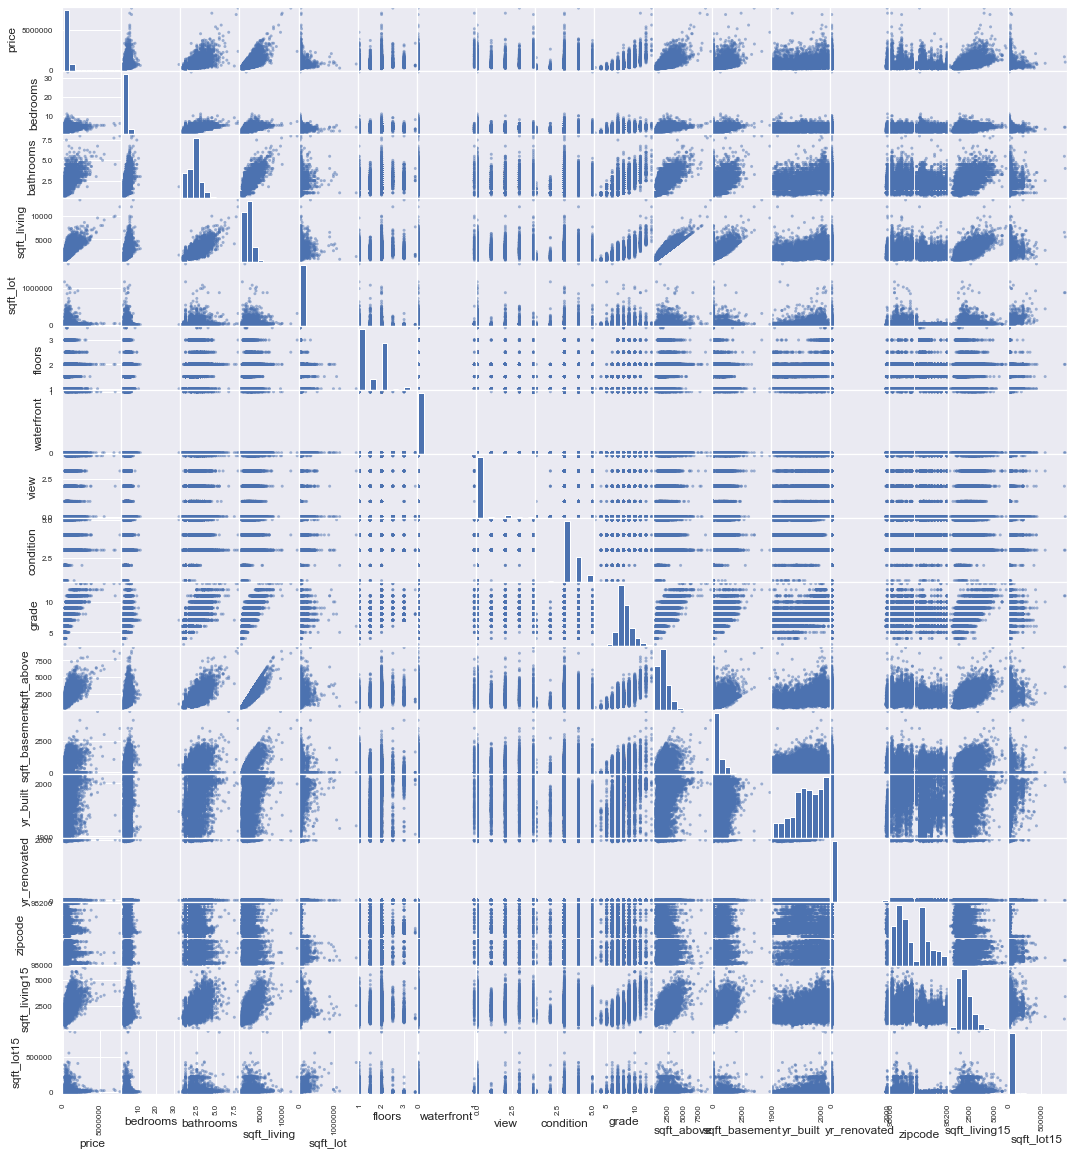

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(df, figsize=(18,20));

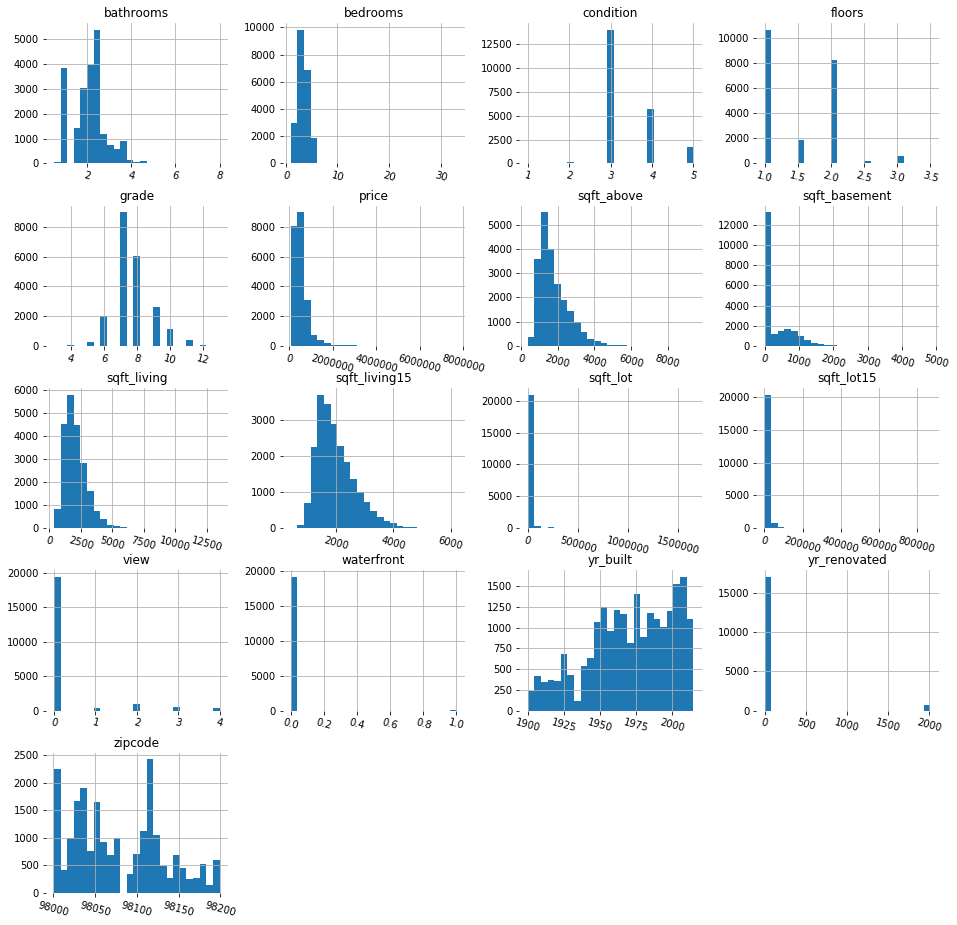

In [14]:
#code below from https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices
import seaborn as sns

df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

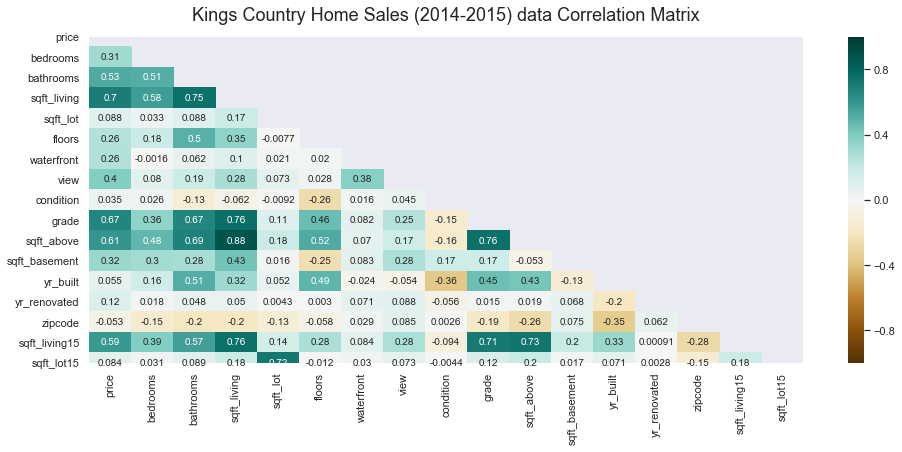

In [53]:
#CHECK FOR MULTI-COLLINEARITY
#CODE FROM: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Kings Country Home Sales (2014-2015) data Correlation Matrix', fontdict={'fontsize':18}, pad=16);

> **Correlation Matrix Takeaways:** 

> 1. **Bathrooms, sqft_living, grade, sqft_above, and sqft_living15** all appear to be positively correlated with price, our independent variable. This makes sense- a larger house typically has more bathrooms and is more expensive.

> 2. A few variables could present problems with multi-collinearity (> .75). 

> - sqft_living & bathrooms
> - sqft_living & grade
> - sqft_living & sqft_above
> - sqft_living & sqft_living15

> 3. When we run our base model, we need to look at dropping **at least one** of these features.


In [161]:
#ANOTHER WAY TO VISUALLY REPRESENT MULTI-COLLINEARITY
test_corr = abs(df.corr()) > 0.75

test_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


In [17]:
#LOOK AT SUM OF BOOLEANS IN EACH ROW TO DETERMINE WHICH VARIABLES HAVE THE MOST CORRELATIONS > .75
sum_row = test_corr.sum(axis=1)
print(sum_row)

price            1
bedrooms         1
bathrooms        2
sqft_living      5
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            3
sqft_above       3
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
sqft_living15    2
sqft_lot15       1
dtype: int64


In [18]:
#DROP date COLUMN
df.drop(['date'],axis=1,inplace=True)

> **Let's explore what features have an effect on price. First, let's look at the categorical variables from the scatter plot** 

> - **View**
> - **Condition**
> - **Grade**
> - **Waterfront**
> - **Floors**
> - **Bedrooms**
> - **Bathrooms**

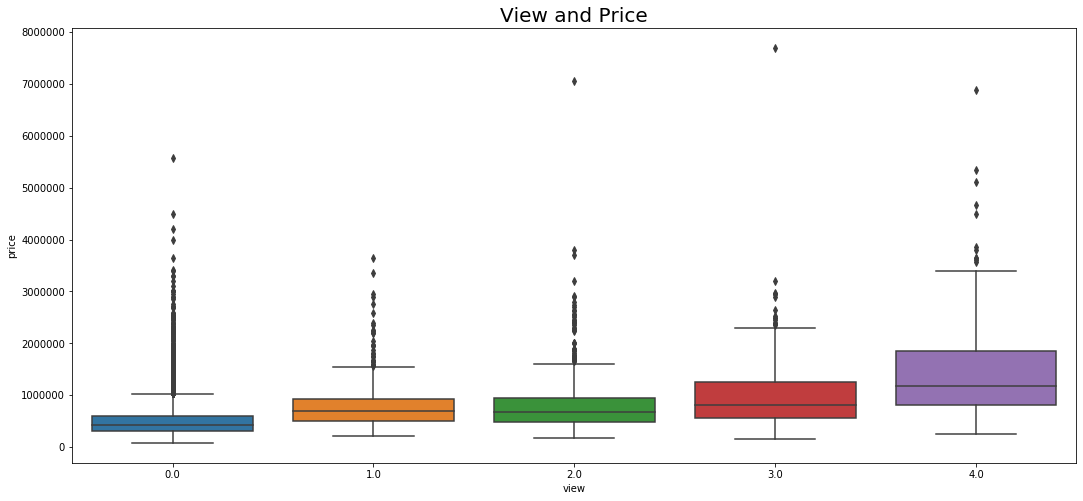

In [20]:
plt.figure(figsize=(18,8))
plt.title('View and Price', fontsize=20)
sns.boxplot(x='view', y='price', data=df);

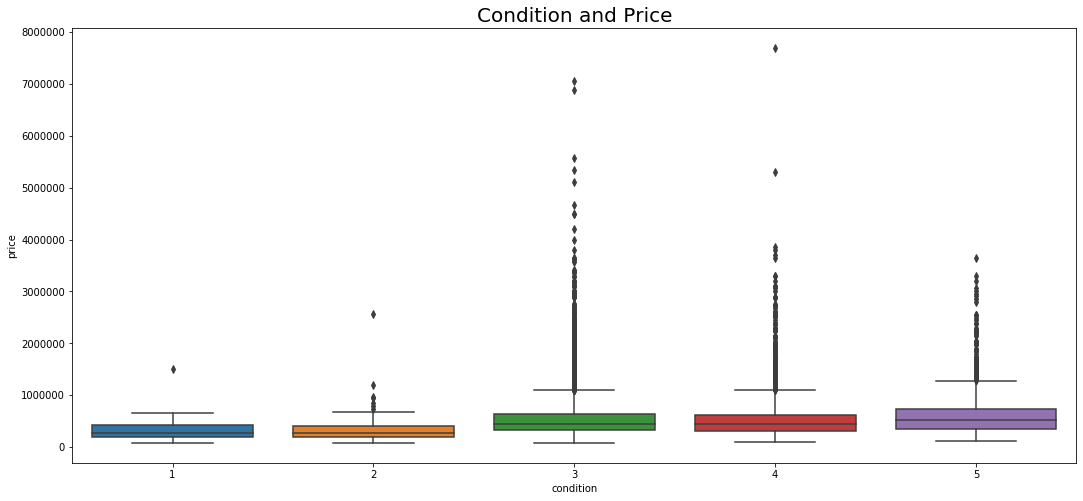

In [21]:
plt.figure(figsize=(18,8))
plt.title('Condition and Price', fontsize=20)
sns.boxplot(x='condition', y='price', data=df);

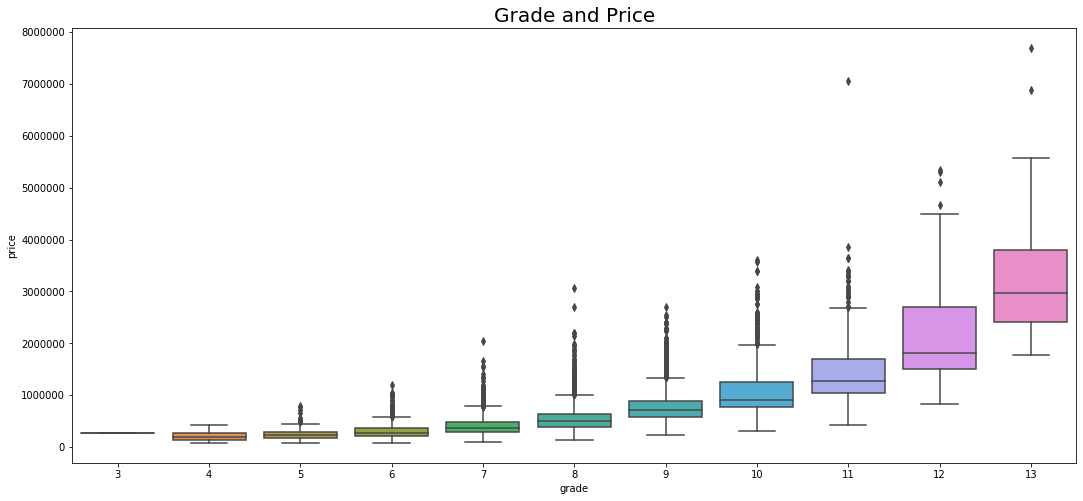

In [22]:
plt.figure(figsize=(18,8))
plt.title('Grade and Price', fontsize=20)
sns.boxplot(x='grade', y='price', data=df);

> **It looks like grade might be a good predictor of house price**

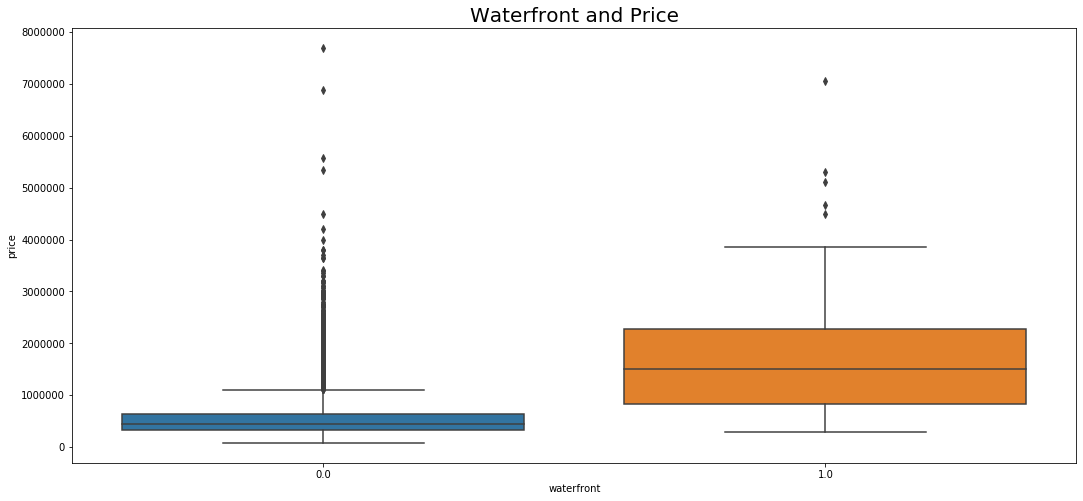

In [23]:
plt.figure(figsize=(18,8))
plt.title('Waterfront and Price', fontsize=20)
sns.boxplot(x='waterfront', y='price', data=df);

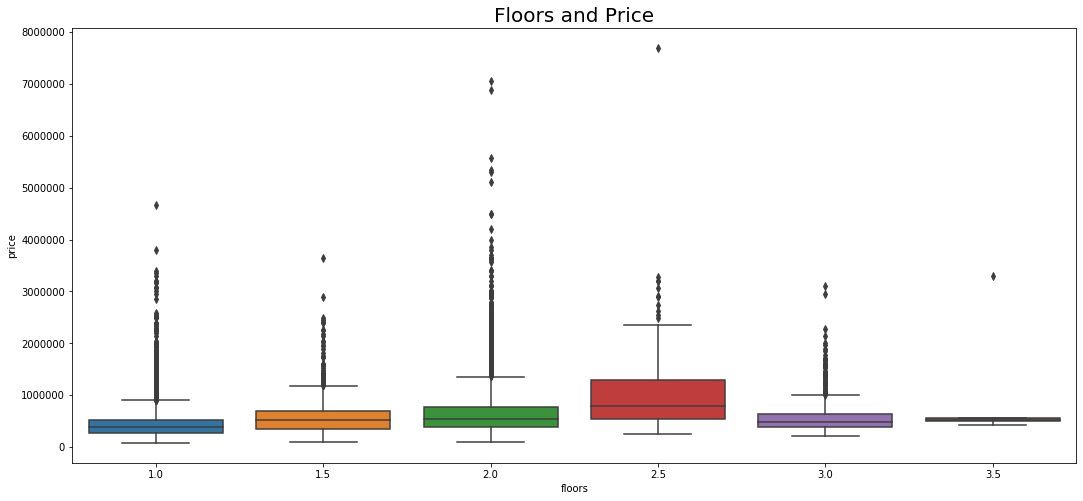

In [24]:
#FLOORS & PRICE
plt.figure(figsize=(18,8))
plt.title('Floors and Price', fontsize=20)
sns.boxplot(x='floors', y='price', data=df);

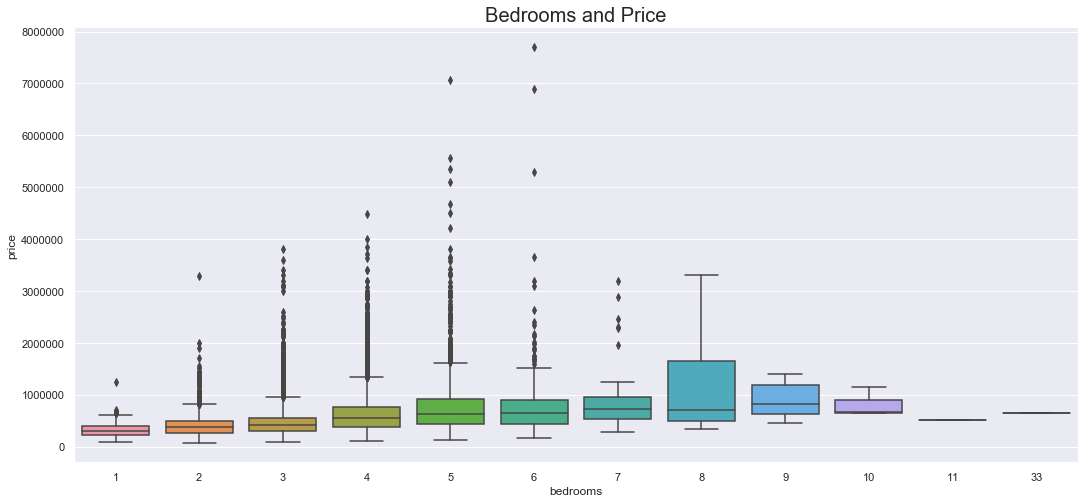

In [25]:
#BEDROOMS & PRICE
sns.set()
plt.figure(figsize=(18,8))
plt.title('Bedrooms and Price', fontsize=20)
sns.boxplot(x='bedrooms', y='price', data=df);

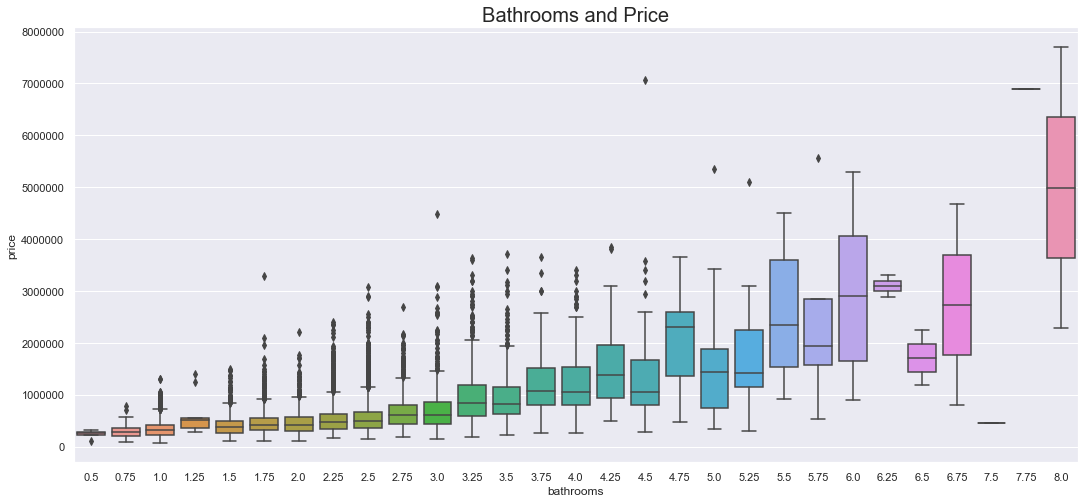

In [26]:
#BATHROOMS & PRICE
plt.figure(figsize=(18,8))
plt.title('Bathrooms and Price', fontsize=20)
sns.boxplot(x='bathrooms', y='price', data=df);

> **Now let's explore some our continuous features:**

> - **sqft_living**
> - **sqft_basement**
> - **sqft_lot**


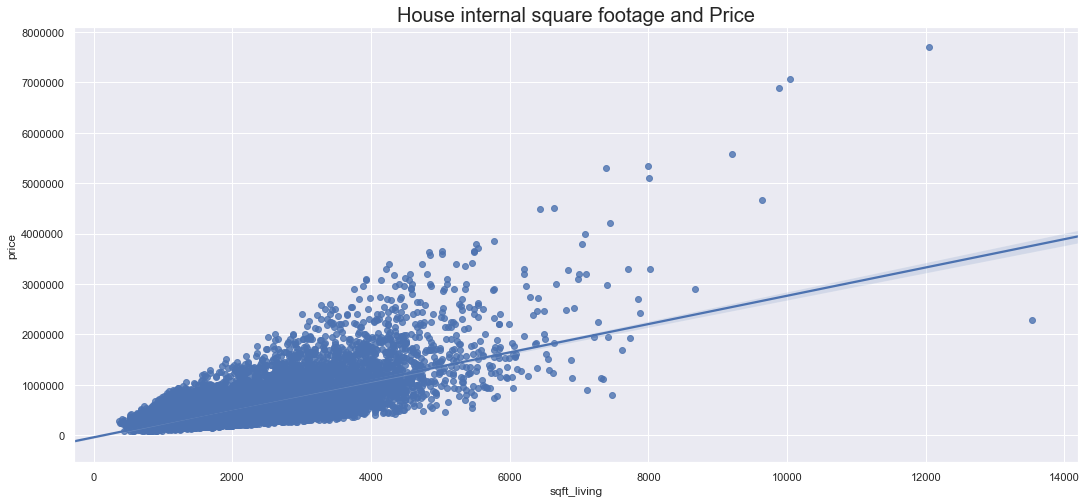

In [28]:
#SQFT_LIVING & PRICE
plt.figure(figsize=(18,8))
plt.title('House internal square footage and Price', fontsize=20)
sns.regplot(x='sqft_living', y='price', data=df, ci=95);


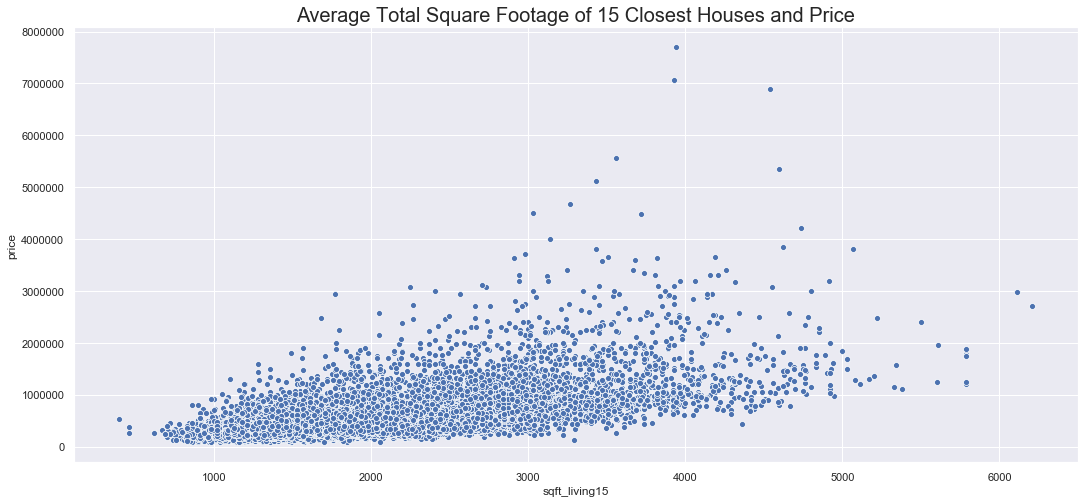

In [159]:
plt.figure(figsize=(18,8))
plt.title('Average Total Square Footage of 15 Closest Houses and Price', fontsize=20)
sns.scatterplot(x='sqft_living15', y='price', data=df);

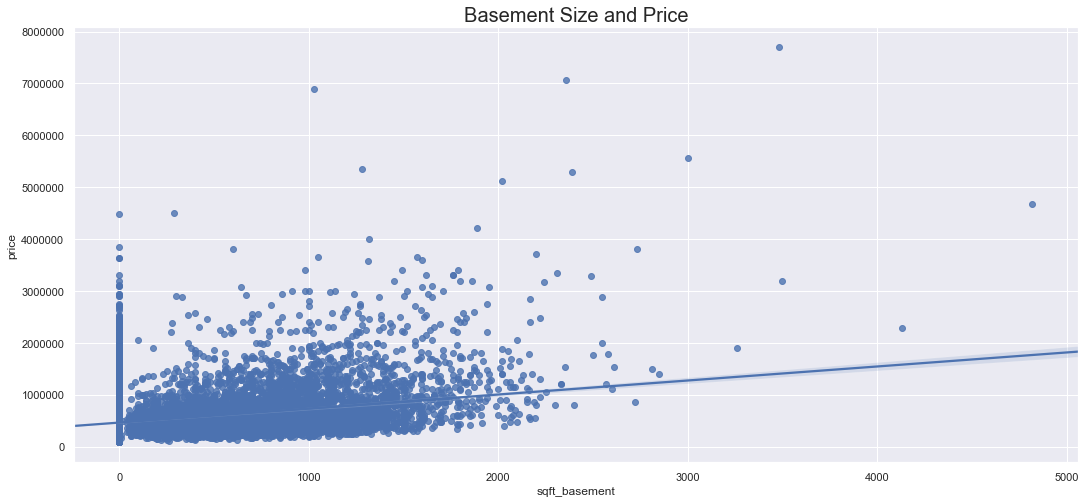

In [29]:
plt.figure(figsize=(18,8))
plt.title('Basement Size and Price', fontsize=20)
sns.regplot(x='sqft_basement', y='price', data=df, ci=95);

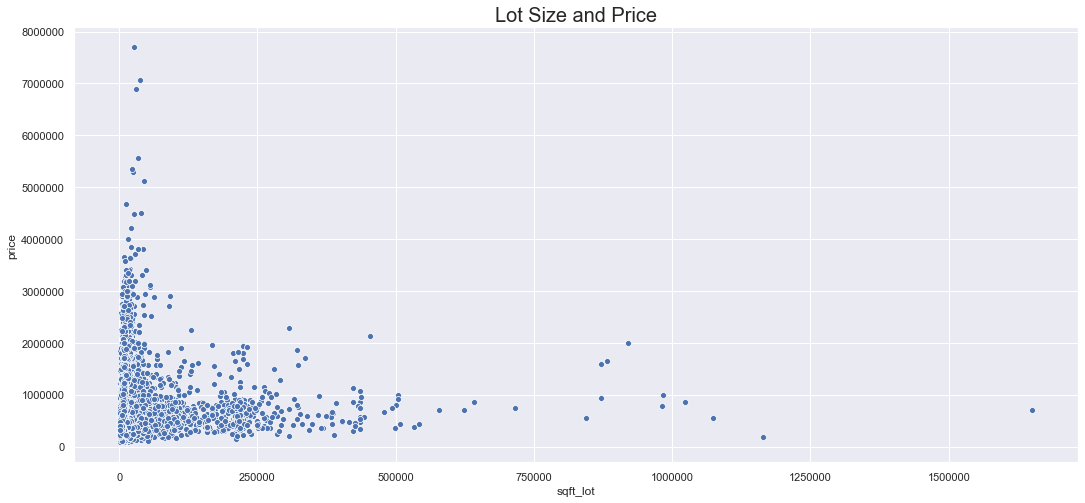

In [30]:
#SQFT_LOT & PRICE
plt.figure(figsize=(18,8))
plt.title('Lot Size and Price', fontsize=20)
sns.scatterplot(x='sqft_lot', y='price', data=df);

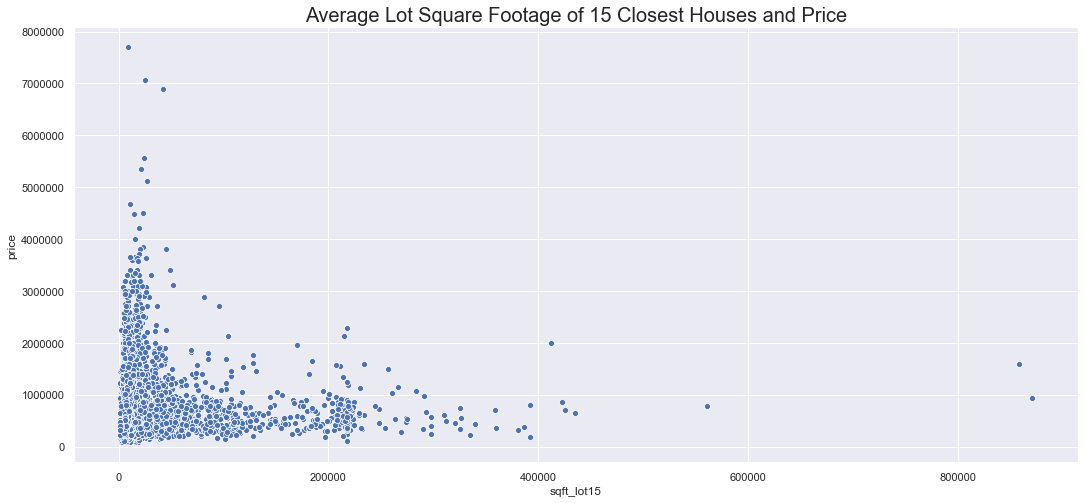

In [57]:
plt.figure(figsize=(18,8))
plt.title('Average Lot Square Footage of 15 Closest Houses and Price', fontsize=20)
sns.scatterplot(x='sqft_lot15', y='price', data=df);

> **EDA findings:**

> - **Grade, waterfront, bathrooms, and total home square-footage** appear to have the largest positive effect on home sale price. 

> - Surprisingly, **view, bedrooms, number of floors, lot size, and basement size** do not appear to have a significant influence on home sale price. 

> **Explanation:** This makes sense when you think about how the data includes homes sold in suburban, rural areas outside of Seattle as well as homes/apartments in the downtown areas. 

> In reality, we'd expect that there are luxury apartments in downtown Seattle with only 1-2 bedrooms that would have a significantly higher sale price than a larger house with more bedrooms located in a more rural area. 

# SCRUB

In [31]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [32]:
#LET'S SEE WHAT PERCENTAGE OF THE FEATURE COLUMNS ARE NANs

waterfront = (2376/21957)*100
view = (63/21957)*100
sqft_basement = (454/21957)*100
yr_renovated = (3842/21957)*100

#df.dropna()

print(f"Waterfront: {waterfront}% of column")
print(f"View: {view}% of column")
print(f"Sqft_Basement: {sqft_basement}% of column")
print(f"Year Renovated: {yr_renovated}% of column")

Waterfront: 10.821150430386666% of column
View: 0.2869244432299494% of column
Sqft_Basement: 2.0676777337523338% of column
Year Renovated: 17.49783668078517% of column


In [33]:
#LET'S DROP THE ROWS WITH NANs FROM view AND sqft_basement BECAUSE THEY'RE SUCH A SMALL PERCENTAGE OF VALUES

df.dropna(subset=['sqft_basement'], inplace=True)

In [34]:
df.dropna(subset=['view'], inplace=True)
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2333
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [35]:
#THE VAST MAJORITY OF waterfront AND yr_renovated DATA IS "0", SO LET'S REPLACE ALL NANs IN THE waterfront COLUMN WITH "0"
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

# MODEL

## BASELINE MODEL

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [160]:
#MAKE A COPY OF THE ORIGINAL DATA FRAME
df_base = df.copy()
df_base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


In [39]:
#FIT OUR BASE MODEL:
#CODE INSPIRED BY: https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices

train_df_base, test_df_base = train_test_split(df_base, train_size = 0.8, random_state=42)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'grade', 'waterfront', 'condition', 
           'zipcode']
linreg_base = LinearRegression()
linreg_base.fit(train_df_base[features], train_df_base['price'])

# TURN COEFFICIENTS INTO A DATAFRAME FOR VIEWING
coefs_base = linreg_base.coef_
view_cfs_base = pd.DataFrame(coefs_base, train_df_base[features].columns, 
                             columns=['coefficients']).sort_values(by='coefficients', ascending = False)

display(view_cfs_base)

# INTERCEPT
print('Intercept: {}'.format(linreg_base.intercept_))

# R2 
print('R2 train value: {}'.format(linreg_base.score(train_df_base[features], train_df_base['price'])))
print('R2 test value: {}'.format(linreg_base.score(test_df_base[features], test_df_base['price'])))



,coefficients
waterfront,769250.347885
grade,105636.951625
condition,59510.975992
zipcode,575.451240
sqft_living,216.092118
sqft_lot,-0.260593
bathrooms,-7284.541032
floors,-23023.811246
bedrooms,-41753.841571


Intercept: -57171328.19494343
R2 train value: 0.5930386136318035
R2 test value: 0.6155017206812767


In [58]:
#PREDICT HOUSE PRICES USING BASE MODEL - Code inspired by:
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

X_test = test_df_base[features]
y_test = test_df_base['price']

pred_base = linreg_base.predict(X_test)

pred_df_base = pd.DataFrame({'Actual': y_test, 'Predicted': pred_base})

df1 = pred_df_base.head(25)

df1

,Actual,Predicted
4000,282500.0,395876.092403
13454,520000.0,500633.103161
6911,546000.0,298516.420124
12662,345000.0,456478.125047
2924,265000.0,395667.162909
...,...,...
17271,735000.0,592634.545499
15815,499950.0,727156.689177
20048,571000.0,534228.579776
14997,915000.0,913792.008160


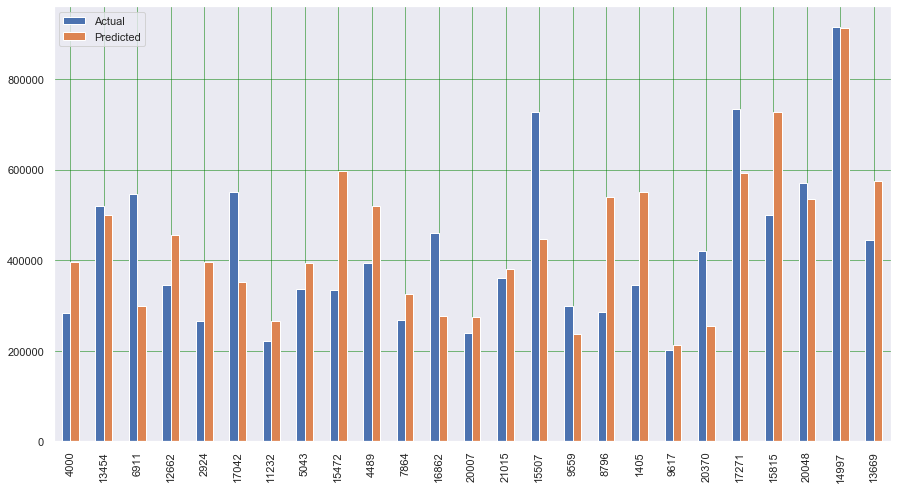

In [59]:
#VISUAL ANALYSIS OF OUR ACTUAL VS. PREDICTED VALUES FROM OUR BASE MODEL
#CODE FROM: 
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [112]:
#ALGORITHM PERFORMANCE CHECK
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_base))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_base))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_base)))

Mean Absolute Error: 153148.6796935118
Mean Squared Error: 51591198317.17545
Root Mean Squared Error: 227136.95938172514


> The **Root Mean Squared Error** above indicates that the squared root of the average difference between our model's prediction and the actual observation in our test data is $227,137. 

> This is statistically significant and demonstrates that our model in not accurate in predicting home prices. 


In [61]:
#LET'S TRY STATSMODELS

import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

outcome = 'price'
predictors = '+'.join(features)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_base).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3478.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:19:34   Log-Likelihood:            -2.9043e+05
No. Observations:               21082   AIC:                         5.809e+05
Df Residuals:                   21072   BIC:                         5.810e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.928e+07   3.04e+06    -19.505      0.000   -6.52e+07   -5.33e+07
bedrooms    -3.703e+04   2210.556    -16.751      0.000   -4.14e+04   -3.27e+04
bathrooms   -6131.5454   3546.445     -1.729      0.084   -1.31e+04     819.757
sqft_living   209.3823      3.501     59.803      0.000     202.520     216.245
sqft_lot       -0.2631      0.040     -6.572      0.000      -0.342      -0.185
floors       -2.45e+04   3652.041     -6.708      0.000   -3.17e+04   -1.73e+04
grade        1.087e+05   2281.055     47.632      0.000    1.04e+05    1.13e+05
waterfront   7.914e+05   1.99e+04     39.858      0.000    7.52e+05     8.3e+05
condition    6.006e+04   2570.942     23.359      0.000     5.5e+04    6.51e+04
zipcode       596.6886     30.968     19.268      0.000     535.990     657.387
==============================================================================
Omnibus:                    15060.422   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           810910.741
Skew:                           2.868   Prob(JB):                         0.00
Kurtosis:                      32.837   Cond. No.                     1.89e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
#MULTI-COLLINEARITY ANALYSIS
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = train_df_base[features]
vif['VIF value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns

vif.round(3)

,VIF value,Feature
0,24.994,bedrooms
1,24.924,bathrooms
2,24.879,sqft_living
3,1.185,sqft_lot
4,13.016,floors
5,120.891,grade
6,1.024,waterfront
7,30.977,condition
8,122.189,zipcode


> **Multicollinearity issues from VIF analysis** - Bedroom, bathroom, and sqft_living are all highly correlated. We'll definitely need to remove one of them when we tune our next model.

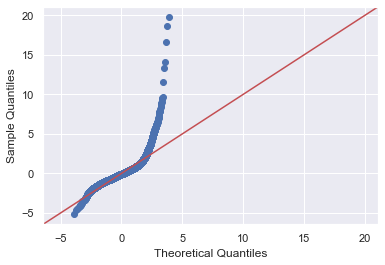

In [63]:
#PLOT A QQ PLOT TO CHECK NORMALITY
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

> **Normality** - Yikes! We have some major issues with normality. We should expect this because we have data that are not scaled properly. 

> For instance, "grade" is on a **discrete and categorical** scale of "3-13", while "sqft_living" is made up of **continuous numerical** values in the thousands. 

> **Check for Heteroscedasticity**

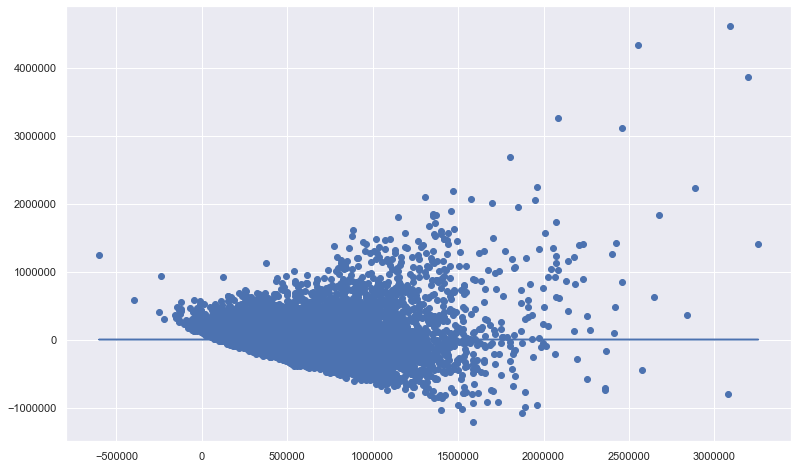

In [64]:
#CHECK FOR HOMOSCEDASTICITY 
plt.subplots(figsize=(13,8))
plt.scatter(model.predict(df_base[features]), model.resid)
plt.plot(model.predict(df_base[features]), [0 for i in range(len(df_base))]);

> - **Yikes again!** We clearly have a heteroscedasticity problem with our data that we'll have to deal with in subsequent models.


> **Conclusions from our base model:**

> **Model fit & R2:** ~.60 for an R2 value indicates our model does not fit well. Only about 60% of the the variance in our data can be explained by the model. 

> **Normality/Residuals check:**
- Very positively skewed with a value of **2.868**
- Kurtosis value of **32.837**, which is well above acceptable value of **3**
- VIF analysis indicates numerous issues with multicollinearity 
- QQ plot indicates the model is not robust, and we need to remove some outliers and normalize (re-scale) some data
- Heteroscedasticity looks to be a problem as well. 
> 
> **Prediction assessment:** 
> - **Actual vs. Predicted** information indicates poor prediction performance from our baseline model
> - **Root Mean Squared Error** of $227,137 is not robust.


> **NEXT STEPS**:  Now that we've looked at the problems in our raw data, the next steps are to do some feature engineering to normalize the data to prepare it better for multivariate linear regression modeling. 

## FINAL MODEL

> **For the final model, we are going to log transform the following features, in order to normalize/scale to increase our model performance:**
>    - sqft_living
>    - bedrooms
>    - bathrooms
>    - sqft_lot
>    - floors
>    - condition
>    - grade
>    - sqft_living15
>    - sqft_lot15
>    - price (independent variable)

> **In this case, we are going to use a logarithm with a base of 10 vs. 2 because we our data vary greatly in magnitude. We need to get them as close to each other as possible to use effectively in our model.**  

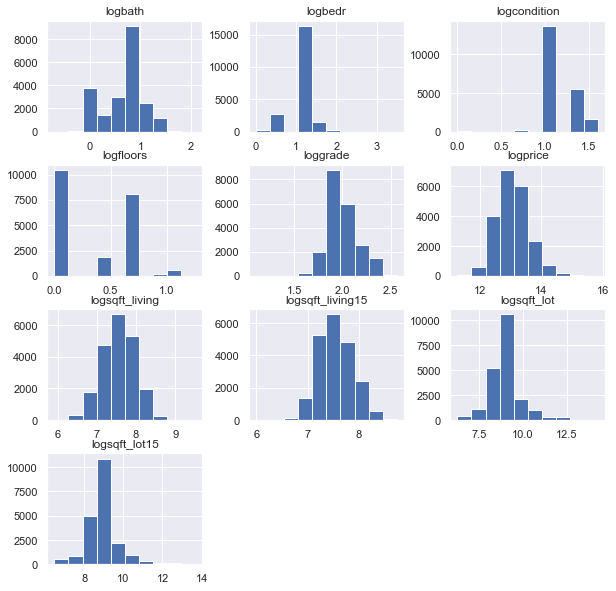

In [150]:
# LOG TRANSFORM DATA THAT DOESN'T HAVE "0" OR NEGATIVE VALUES. WE'LL ALSO REMOVE SOME OF THE FEATURES WITH 
# MULTI-COLLINEARITY PROBLEMS LIKE sqft_above


data_log = pd.DataFrame([])
data_log['logsqft_living'] = np.log(df['sqft_living'])
data_log['logbedr'] = np.log(df['bedrooms'])
data_log['logbath'] = np.log(df['bathrooms'])
data_log['logsqft_lot'] = np.log(df['sqft_lot'])
data_log['logfloors'] = np.log(df['floors'])
data_log['logcondition'] = np.log(df['condition'])
data_log['loggrade'] = np.log(df['grade'])
data_log['logsqft_living15'] = np.log(df['sqft_living15'])
data_log['logsqft_lot15'] = np.log(df['sqft_lot15'])
data_log['logprice'] = np.log(df['price'])

data_log.hist(figsize  = [10, 10]);

In [151]:
#TRAIN SECOND MODEL

X_2 = (data_log.drop(['logprice'], axis=1)) #REMOVED logsqft_above DUE TO MULTICOLLINEARITY
y_2 = data_log['logprice']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size= 0.3, random_state=42)

linreg_2 = LinearRegression()
linreg_2.fit(X_train_2, y_train_2)


# TURN COEFFICIENTS INTO A DATAFRAME FOR VIEWING
coefs_2 = linreg_2.coef_
view_cfs_2 = pd.DataFrame(coefs_2, X_2.columns, 
                          columns=['coefficients']).sort_values(by='coefficients', ascending = False)

display(view_cfs_2)

# INTERCEPT
print('Intercept: {}'.format(linreg_2.intercept_))

# R2 
print('R2 train value: {}'.format(linreg_2.score(X_train_2, y_train_2)))
print('R2 test value: {}'.format(linreg_2.score(X_test_2, y_test_2)))

,coefficients
loggrade,1.364277
logsqft_living,0.529807
logcondition,0.357255
logsqft_living15,0.280002
logsqft_lot,-0.001208
logfloors,-0.026349
logsqft_lot15,-0.077211
logbath,-0.099074
logbedr,-0.190259


Intercept: 4.745266576844754
R2 train value: 0.5747292808382878
R2 test value: 0.5742756084557397


> **Coefficient interpretation after log transform:**  
> - Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable. 
> - To interpret using numbers that make sense, we need to **back-transform our log transformed coefficients.** 
> - For x percent increase, calculate 1.x to the power of the coefficient, subtract 1, and multiply by 100.
> - Citation: https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

In [152]:
#BACK-TRANSFORMATION CALCULATION FOR TOP THREE COEFFICIENTS

print('loggrade:', round(((2.36**1.36)-1)*100) , '%')
print('logsqft_living:', round(((1.53**.53)-1)*100) ,'%')
print('logsqft_condition:', round(((1.35**.35)-1)*100) ,'%')


loggrade: 221 %
logsqft_living: 25 %
logsqft_condition: 11 %


> **Top 3 coefficient analysis:**

> **1. loggrade:** For every 136% increase in price, the grade (builing construction and design quality) of a house increases by about 221%

> **2. logsqft_living:** For every 53% increase in price, the internal square foot of a house increases by about 25%

> **2. logsqft_condition:** For every 35% increase in price, the overall condition of a house increases by about 11%

In [154]:
#PREDICT HOUSE PRICES USING NEW MODEL

pred_df_base_2 = pd.DataFrame({'Actual': y_test_2, 'Predicted': y_predict_2})

df2 = pred_df_base_2.head(25)

df2

,Actual,Predicted
4000,12.551434,12.884859
13454,13.161584,12.979444
6911,13.210374,12.642721
12662,12.751300,13.032536
2924,12.487485,12.716879
...,...,...
17271,13.507626,13.101966
15815,13.122263,13.344917
20048,13.255144,13.260976
14997,13.726679,13.639742


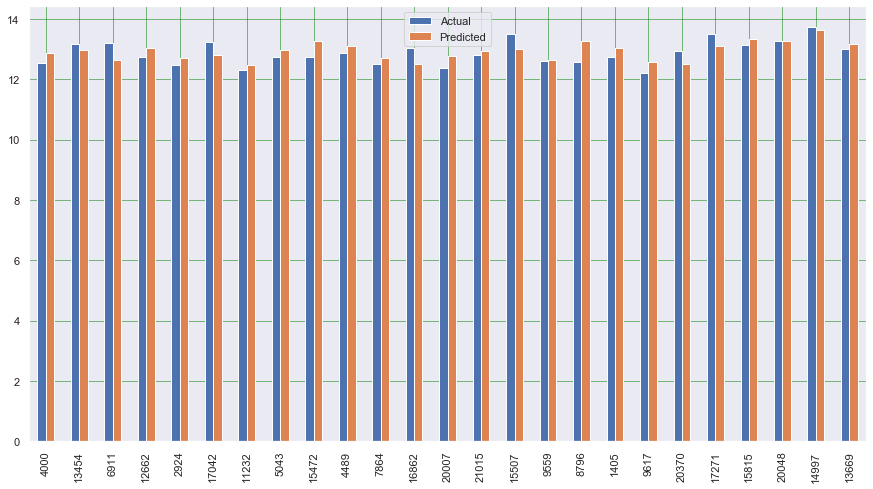

In [155]:
#CODE FROM: 
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

df2.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [156]:
#LET'S TRY STATSMODELS AGAIN

features_2 = ['logsqft_living', 'logbedr', 'logbath', 'logsqft_lot', 'logfloors', 'logcondition', 'loggrade',
              'logsqft_living15', 'logsqft_lot15']

outcome = 'logprice'
predictors = '+'.join(features_2)
formula = outcome + '~' + predictors
model_2 = ols(formula=formula, data=data_log).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     3163.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:41:32   Log-Likelihood:                -7373.6
No. Observations:               21082   AIC:                         1.477e+04
Df Residuals:                   21072   BIC:                         1.485e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7863      0.074     64.735      0.000       4.641       4.931
logsqft_living       0.5287      0.013     41.048      0.000       0.503       0.554
logbedr             -0.1871      0.011    -16.569      0.000      -0.209      -0.165
logbath             -0.0990      0.010     -9.703      0.000      -0.119      -0.079
logsqft_lot          0.0010      0.007      0.142      0.887      -0.012       0.014
logfloors           -0.0235      0.009     -2.707      0.007      -0.041      -0.006
logcondition         0.3684      0.014     27.064      0.000       0.342       0.395
loggrade             1.3953      0.027     52.603      0.000       1.343       1.447
logsqft_living15     0.2661      0.012     22.550      0.000       0.243       0.289
logsqft_lot15       -0.0803      0.007    -10.777      0.000      -0.095      -0.066
==============================================================================
Omnibus:                       55.651   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.293
Skew:                           0.120   Prob(JB):                     5.97e-13
Kurtosis:                       3.081   Cond. No.                         532.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

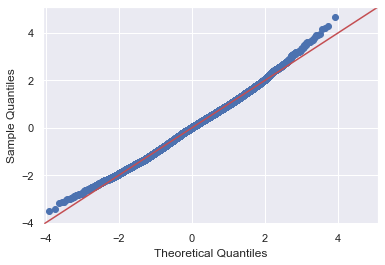

In [157]:
# QQ PLOT TO CHECK NORMALITY
fig_2 = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True);

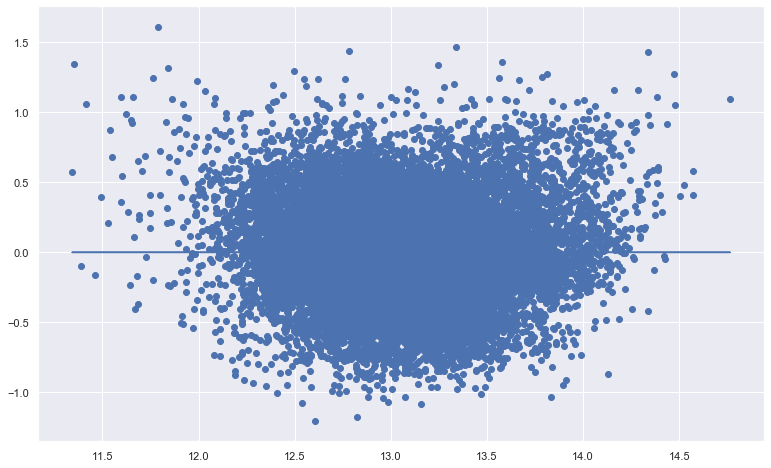

In [158]:
#CHECK FOR HOMOSCEDASTICITY 
plt.subplots(figsize=(13,8))
plt.scatter(model_2.predict(data_log[features_2]), model_2.resid)
plt.plot(model_2.predict(data_log[features_2]), [0 for i in range(len(data_log))]);

# iNTERPRET


> **Model fit & R2:** .574 adjusted R2 value indicates our model still does not fit well. We're still only able to explain about 60% of the the variance in our data via the model. 

> **Normality/Residuals** check after log transformation:
- Skewness was significantly reduced from **2.868** down to **.142**
- Kurtosis value of **32.837** was also significantly reduced to **3.145**
- QQ plot looks significantly better
- Heteroscedasticity problem was significantly reduced from the log transformation 
> 
> **Prediction assessment:** 
> - **Actual vs. Predicted** information indicates **strong** prediction performance compared to the baseline model
> 


# CONCLUSIONS & RECOMMENDATIONS

> **Conclusion:** The features that had the most significant positive correlation with home sale price were **Grade, Overall Square-Footage, and Condition.** Indeed, our model relieved most heavily on these features to predict home sale prices.

> **Recommendations:**

> **Buyer:** Downplay the importance of the above features (especially grade) during negotiations with the seller. Through your real estate agent, indicate to the seller that you are looking at other homes in the area that better fit your needs (i.e. more bedrooms, bathrooms).      

> **Seller:** Looks at ways to increase the overall grade for your house. Obtain the grading criteria used to generate the data and pick tangible, low-effort/cost areas where you can make improvements to your home that increase your score. Make improvements to justify a larger asking price.

> **Real estate agents:** 

> - **Buy side-** provide the buyer with a multiple home options that meet their price point (regardless of grade). During negotiations with the selling agent, emphasize that the buyer is more concerned with location than the features of a specific house. Also emphasize the renovations and home improvements that the buyer will have to make after purchase. Suggest a reduction of the sale price to compensate for these future improvements.

> - **Sell side-** use home sale volume in your area to indicate to the buyer that you have multiple offers on the home being sold and that it is a "seller's market." Convey a sense of urgency to the buying agent, and that grade represents an industry standard "desirability" rating.



> **Future research:**
> - Research school zoning data and home distance from elementary, middle, and high schools.

> - Pull new home sale data from after the start of the COVID-19 pandemic, specifically looking at home sale trends in urban vs. rural areas. 

> - Examine crime statistics effect on home prices.

 



## CUT LINE FOR NOTEBOOK

In [153]:
#CALCULATE ERROR FOR LOG TRANSFORMED DATA

# y_predict_2 = linreg_2.predict(X_test_2)

# linreg_2_mse = mean_squared_error(y_predict_2, y_test_2)


# print('Mean Absolute Percentage Error:', metrics.mean_absolute_error(y_test_2, y_predict_2))  
# print('Mean Squared Percentage Error:', metrics.mean_squared_error(y_test_2, y_predict_2))  
# print('Root Mean Squared Percentage Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_predict_2)))

Mean Absolute Percentage Error: 0.27464163957887944
Mean Squared Percentage Error: 0.1190270592903375
Root Mean Squared Percentage Error: 0.34500298446584127


> The **Root Mean Squared Percentage Error** above indicates that the squared root of the average **percentage** of the difference between our model's prediction and the log transformed observations in our test data is 34%.

In [136]:
#DUMMY VARIABLES FOR CONDITION, AND GRADE

dummy_condition = pd.get_dummies(df['condition'], prefix= 'cond')
dummy_grade = pd.get_dummies(df['grade'], prefix= 'grade')

display(dummy_condition.head())
display(dummy_grade.head())

,cond_1,cond_2,cond_3,cond_4,cond_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0


,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.